# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from tabulate import tabulate

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 15]
    plt.rcParams['font.size'] = 30
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Load Data

In [3]:
df_raw = pd.read_csv( '/home/jeffsmedines/repos/pa4/health_insurance_cross_sell/data/raw/train.csv' )

In [4]:
pwd

'/home/jeffsmedines/repos/pa4/health_insurance_cross_sell/notebooks'

# 1.0 STEP 01 - DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

## 1.1 Columns Description

In [6]:
tab_meanings = [['Column', 'Meaning'],
        ['id', 'unique customer identifier.'],
        ['gender', 'client gender: Male / Female.'],
        ['age', 'customer age.'],
        ['region_code', 'customer region code.'],
        ['policy_sales_channel', 'Anonymized Code for the channel of outreaching to the customer. Ie: Over Mail, Over Phone, In Person, etc..'],
        ['driving_license', '0 = customer does not have DL, 1 = already have DL'],
        ['vehicle_age', 'vehicle age: < 1 Year, 1-2 Year, > 2 Years'],
        ['vehicle_damage', 'No = customer has never had their vehicle damaged in the past, Yes = has had it.'],
        ['vehicle_prev_insured', '0 = customer does not have vehicle insurance, 1= already has vehicle insurance.'],
        ['health_annual_premium', 'annual amount paid by the customer to the company for health insurance. Currency: Rs(Pakistani rupee, R$1.00 = ± Rs0.03).'],
        ['days_associated', 'number of days since the customer joined the company by purchasing health insurance. The policy is annual.'],
        ['response', '0 = customer is not interested, 1 = customer is interested.']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='rst'))

=====================  =========================================================================================================================
Column                 Meaning
=====================  =========================================================================================================================
id                     unique customer identifier.
gender                 client gender: Male / Female.
age                    customer age.
region_code            customer region code.
policy_sales_channel   Anonymized Code for the channel of outreaching to the customer. Ie: Over Mail, Over Phone, In Person, etc..
driving_license        0 = customer does not have DL, 1 = already have DL
vehicle_age            vehicle age: < 1 Year, 1-2 Year, > 2 Years
vehicle_damage         No = customer has never had their vehicle damaged in the past, Yes = has had it.
vehicle_prev_insured   0 = customer does not have vehicle insurance, 1= already has vehicle insurance.
health_annual_p

## 1.2 Data Dimensions

In [7]:
print( f'Number of Rows: {df1.shape[0]}' )
print( f'Number of Cols: {df1.shape[1]}' )

Number of Rows: 381109
Number of Cols: 14


## 1.3 Data Types

In [8]:
df1.dtypes

id                        int64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
id.1                      int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
id.2                      int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 1.4 Check NA's

In [9]:
df1.isna().sum()

id                      0
previously_insured      0
annual_premium          0
vintage                 0
response                0
id.1                    0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
id.2                    0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.5 Fill NA's

In [10]:
# Not Necessary

## 1.6 Change Types

In [11]:
df1['region_code'] = df1['region_code'].astype( int )

In [12]:
# Check Change
df1['region_code'].dtypes

dtype('int64')

## 1.7 Drop Columns

In [13]:
df1 = df1.drop( columns=['id.1', 'id.2'] )

## 1.8 Descriptive Statistics

In [14]:
num_attributes = df1.select_dtypes( include=['int64', np.float64] )
cat_attributes = df1.select_dtypes( exclude=['int64', np.float64] )

### 1.8.1 Numerical Attributes

In [15]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - Std, min, max, range, skewness, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [16]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,-8.071174e-18,-1.200000
1,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
2,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
3,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
4,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788
5,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
6,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
7,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
8,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302


### 1.8.2 Categorical Attributes

In [17]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

<AxesSubplot:xlabel='vehicle_age', ylabel='id'>

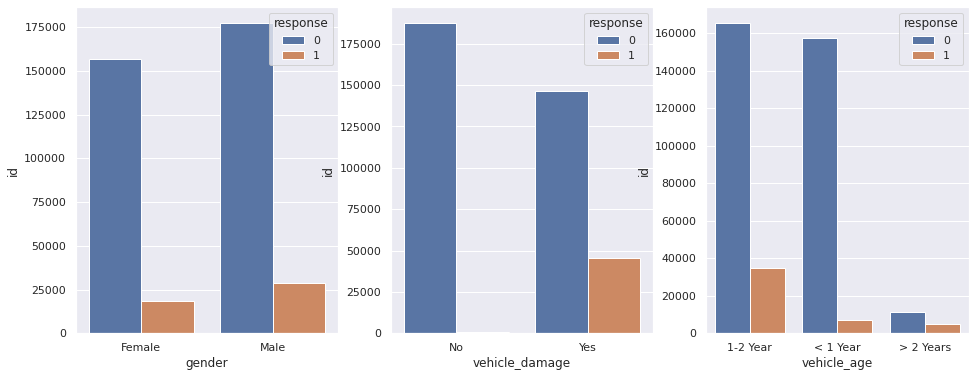

In [18]:
aux = df1.copy()

plt.figure( figsize=(16, 6) )

# Graph 1 - Gender
plt.subplot( 131 )
aux1 = aux[['gender', 'response', 'id']].groupby( ['gender', 'response'] ).count().reset_index()
sns.barplot( x='gender', y='id', hue='response', data=aux1 )


# Graph 2 - Vehicle Damage
plt.subplot( 132 )
aux1 = aux[['vehicle_damage', 'response', 'id']].groupby( ['vehicle_damage', 'response'] ).count().reset_index()
sns.barplot( x='vehicle_damage', y='id', hue='response', data=aux1 )


# Graph 3 - Vehicle Age
plt.subplot( 133 )
aux1 = aux[['vehicle_age', 'response', 'id']].groupby( ['vehicle_age', 'response'] ).count().reset_index()
sns.barplot( x='vehicle_age', y='id', hue='response', data=aux1 )

# 2.0 STEP 02 - FEATURE ENGINEERING

In [19]:
df2 = df1.copy()

In [20]:
# vehicle_damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

# vehicle_age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'below_1_year' if x == '< 1 Year' else 
                                                         'between_1_2_year' if x == '1-2 Year' else 
                                                         'over_2_years' )

# 3.0 STEP 03 - DATA FILTERING

In [22]:
df3 = df2.copy()

# 4.0 STEP 04 - EXPLORATORY DATA ANALYSIS

In [23]:
df4 = df3.copy()

## 4.1 Univariate Analysis

In [24]:
df4.columns

Index(['id', 'previously_insured', 'annual_premium', 'vintage', 'response',
       'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

### 4.1.1 Age

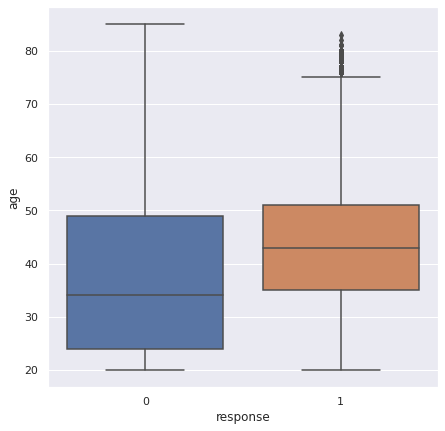

In [25]:
# age
sns.set(rc={'figure.figsize':(7, 7)})
sns.boxplot( x='response', y='age', data=df4 );

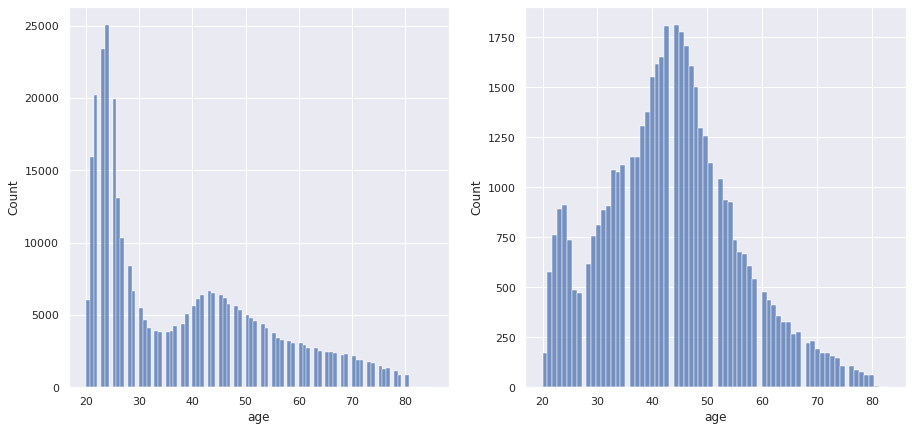

In [26]:
# Plot size
sns.set(rc={'figure.figsize':(15, 7)})

# Graph 1 - 'No'
plt.subplot( 121 )
aux1 = df4.loc[df4['response'] == 0, 'age']
sns.histplot( aux1 );

# Graph 2 - 'Yes'
plt.subplot( 122 )
aux1 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( aux1 );

### 4.1.2 Annual Premium

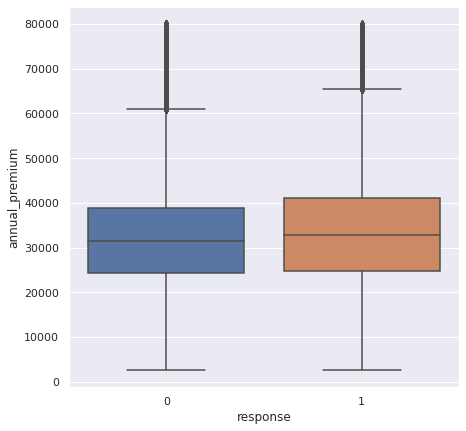

In [27]:
# annual_premium
sns.set(rc={'figure.figsize':(7, 7)})
aux1 = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data=aux1 );

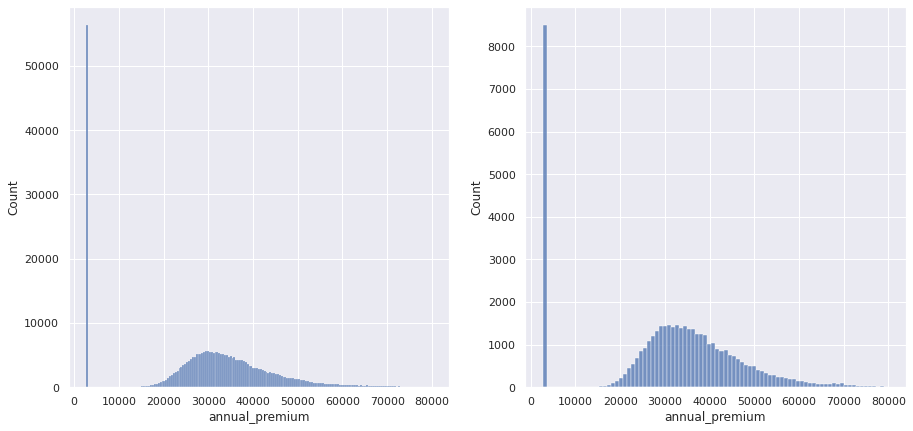

In [28]:
# Plot size
sns.set(rc={'figure.figsize':(15, 7)})

# Graph 1 - 'No'
plt.subplot( 121 )
aux2 = aux1.loc[aux1['response'] == 0, 'annual_premium']
sns.histplot( aux2 );

# Graph 2 - 'Yes'
plt.subplot( 122 )
aux3 = aux1.loc[aux1['response'] == 1, 'annual_premium']
sns.histplot( aux3 );

### 4.1.3 Driving License

In [29]:
# driving_license
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
aux.head()

,id,previously_insured,annual_premium,vintage,response,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,driving_license_perc
0,7,0,23367.0,249,0,Male,23,11,152.0,1,< 1 Year,Yes,0.000003
1,13,1,31409.0,221,0,Female,41,15,14.0,1,1-2 Year,No,0.000003
2,18,1,46622.0,299,0,Female,25,35,152.0,1,< 1 Year,No,0.000003
3,31,0,2630.0,136,0,Female,26,8,160.0,1,< 1 Year,No,0.000003
4,39,0,42297.0,264,0,Male,45,8,124.0,1,1-2 Year,Yes,0.000003


<AxesSubplot:xlabel='response', ylabel='driving_license'>

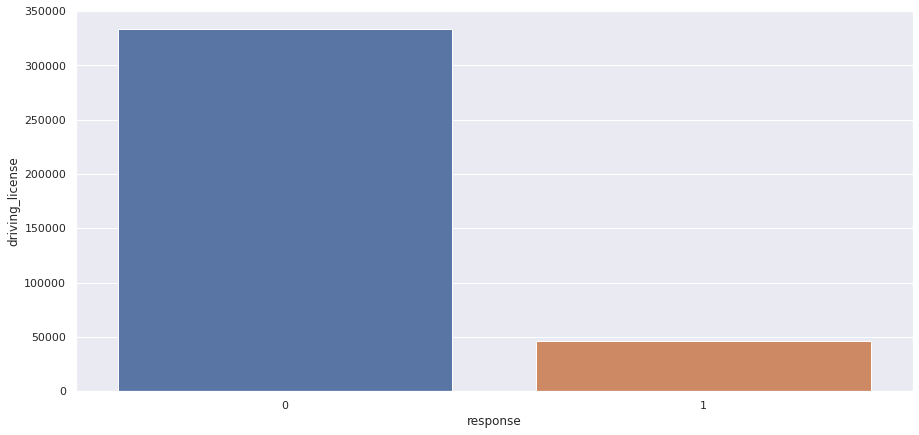

In [30]:
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
sns.barplot( x='response', y='driving_license', data=aux )

### 4.1.4 Region Code

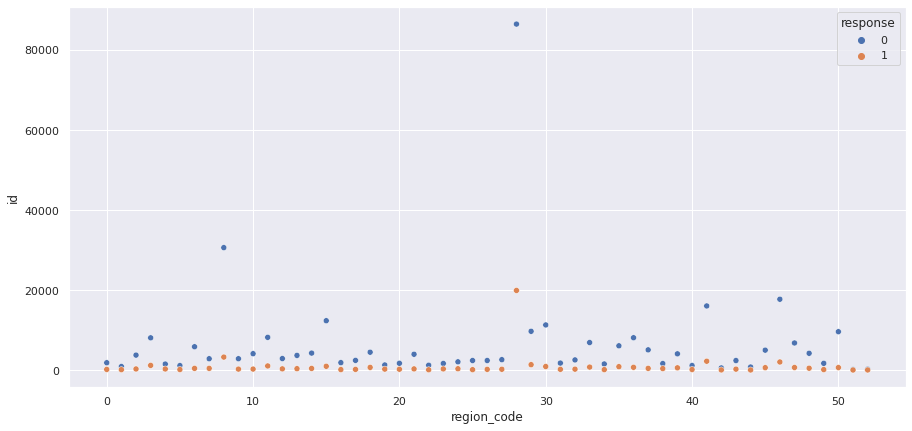

In [31]:
# region_code
aux0 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()

sns.scatterplot( x='region_code', y='id', hue='response', data=aux0 );

### 4.1.5 Previously Insured

In [32]:
# previously insured
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


### 4.1.6 Vehicle Age

In [33]:
# vehicle_age
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


### 4.1.7 Policy Sales Channel

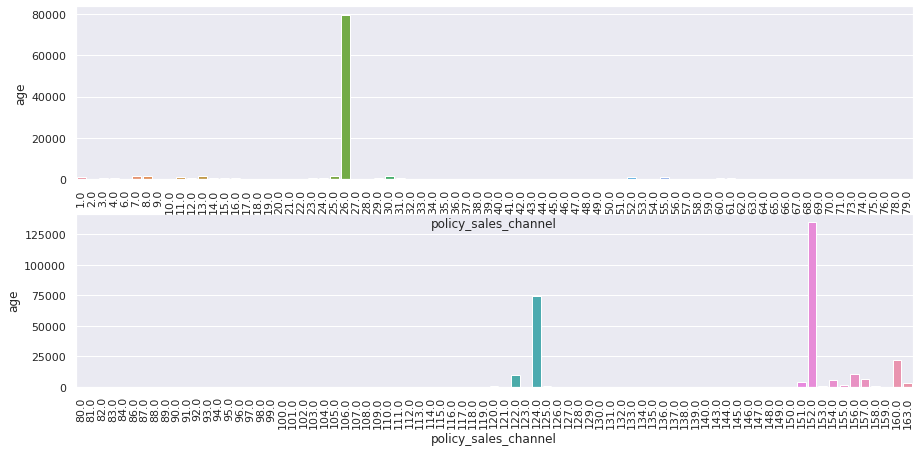

In [34]:
plt.subplot( 212 )
aux1 = df4[df4['policy_sales_channel'] >= 80.0].groupby( 'policy_sales_channel' )['age'].count().reset_index()
sns.barplot( x='policy_sales_channel', y='age', data=aux1 )
plt.xticks(rotation=90);

plt.subplot( 211 )
aux2 = df4[df4['policy_sales_channel'] < 80.0].groupby( 'policy_sales_channel' )['age'].count().reset_index()
sns.barplot( x='policy_sales_channel', y='age', data=aux2 )
plt.xticks(rotation=90);

### 4.1.8 Vintage

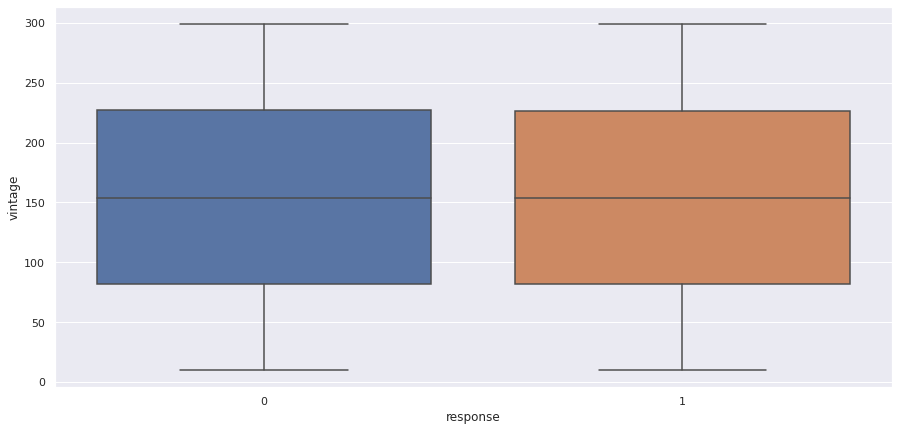

In [38]:
# vintage
sns.boxplot( x='response', y='vintage', data=df4 );

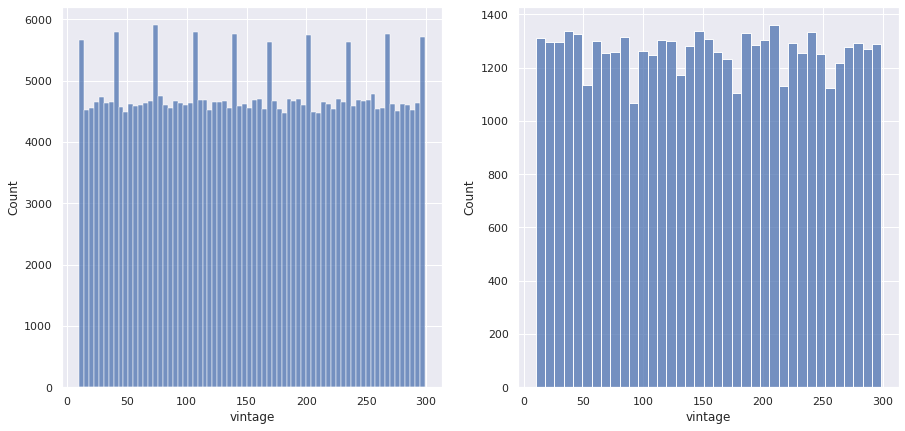

In [44]:
# Graph 1 - Dist of Response = No
plt.subplot( 121 )
aux1 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( aux1 );

# Graph 1 - Dist of Response = Yes
plt.subplot( 122 )
aux2 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( aux2 );

# 5.0 STEP 05 - FEATURE SELECTION

# 6.0 STEP 06 - DATA PREPARATION

# 7.0 STEP 07 - MACHINE LEARNING MODELLING